In [1]:
from fastai import *
from fastai.vision import *

In [2]:
path = Path('/home/jupyter/HumpbackWhaleIdentification/data')
path.ls()

[PosixPath('/home/jupyter/HumpbackWhaleIdentification/data/train.csv'),
 PosixPath('/home/jupyter/HumpbackWhaleIdentification/data/test'),
 PosixPath('/home/jupyter/HumpbackWhaleIdentification/data/train'),
 PosixPath('/home/jupyter/HumpbackWhaleIdentification/data/sample_submission.csv'),
 PosixPath('/home/jupyter/HumpbackWhaleIdentification/data/models'),
 PosixPath('/home/jupyter/HumpbackWhaleIdentification/data/labels.csv')]

In [3]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/w_fb8e059/872d7a6f4.jpg,w_fb8e059
1,train/w_fb8e059/c96430b67.jpg,w_fb8e059
2,train/w_c85ff1e/3c8c68129.jpg,w_c85ff1e
3,train/w_c85ff1e/7828ee757.jpg,w_c85ff1e
4,train/w_c85ff1e/f88abffab.jpg,w_c85ff1e


In [4]:
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_csv(path, ds_tfms=tfms, size=28)

/opt/anaconda3/lib/python3.7/site-packages/fastai/data_block.py:487: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
w_17338da, w_1f1774e, w_e94b46a, w_d23bd09, w_74ada4e...
  if getattr(ds, 'warn', False): warn(ds.warn)


In [5]:
len(data.classes)

4533

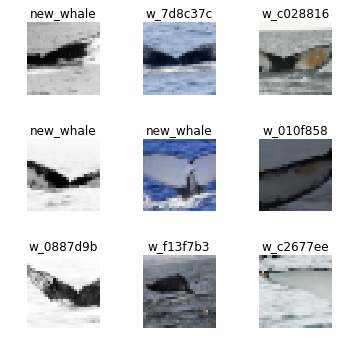

In [6]:
data.show_batch(rows=3, figsize=(5,5))

In [7]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)
learn.fit(2)

epoch,train_loss,valid_loss,accuracy
1,6.084575,5.347506,0.419348
2,5.790602,5.274189,0.419788
